<a href="https://colab.research.google.com/github/MartinSomsak00/MLF/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [157]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

In [158]:
model = Sequential()
model.add(InputLayer(input_shape=(2,)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [159]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [160]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [161]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

In [162]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


In [163]:
for id_x, data_sample in enumerate(X):
    prediction = model.predict(np.expand_dims(data_sample, axis=0))  # Oprava
    print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Data sample is [0 0], prediction from model [[0.01686175]], ground_truth 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Data sample is [0 1], prediction from model [[0.9846227]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Data sample is [1 0], prediction from model [[0.9776642]], ground_truth 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
Data sample is [1 1], prediction from model [[0.01418977]], ground_truth 0


Text(0, 0.5, 'loss')

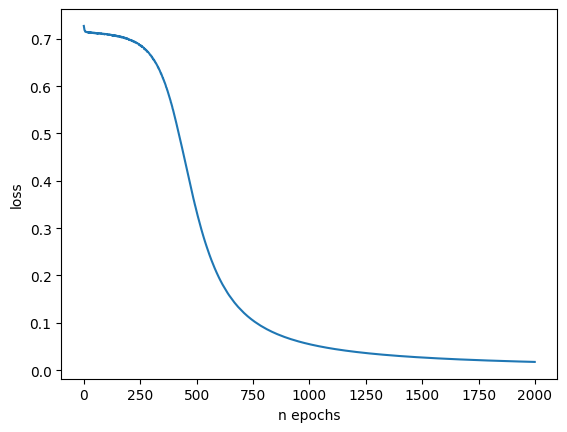

In [164]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

In [179]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [166]:
from google.colab import files
uploaded = files.upload()

Saving voting_complete.csv to voting_complete (2).csv


In [167]:
path_to_dataset = 'voting_complete.csv' # change the PATH
pd_dataset = pd.read_csv(path_to_dataset)

In [168]:
pd_dataset

,Unnamed: 0,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [169]:
def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]  # Vynechat první sloupec (ID)
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_amount = int(len(index) * test_ratio)
    train_ids = index[train_amount:]
    test_ids = index[:train_amount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index(drop=True)
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index(drop=True)

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]

In [170]:
x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

In [171]:
x_train.replace('?', np.nan, inplace=True)
x_train.fillna(x_train.mode().iloc[0], inplace=True)

In [172]:
x_train = pd.get_dummies(x_train)

In [173]:
y_train = y_train.replace({'republican': 1, 'democrat': 0})

<ipython-input-173-3b560daac46a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'republican': 1, 'democrat': 0})


In [174]:
model = Sequential()
model.add(Dense(2, input_shape=(x_train.shape[1],), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [175]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

In [176]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [180]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [189]:
history = model.fit(X_train, y_train,
                    epochs=40,
                    batch_size=4,
                    verbose=1,
                    validation_data=(X_val, y_val))

Epoch 1/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9900 - loss: 0.0416 - val_accuracy: 0.9429 - val_loss: 0.2594
Epoch 2/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0378 - val_accuracy: 0.9143 - val_loss: 0.8744
Epoch 3/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9737 - loss: 0.0945 - val_accuracy: 0.9571 - val_loss: 0.3287
Epoch 4/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9714 - loss: 0.0590 - val_accuracy: 0.9286 - val_loss: 0.3078
Epoch 5/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9740 - loss: 0.0658 - val_accuracy: 0.9286 - val_loss: 0.3794
Epoch 6/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9920 - loss: 0.0393 - val_accuracy: 0.9429 - val_loss: 0.3941
Epoch 7/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0561 - val_accuracy: 0.9286 - val_loss: 0.6590
Epoch 8/40
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0681 - val_accuracy: 0.9429 - val_loss:

In [182]:
x_test.replace('?', np.nan, inplace=True)
x_test.fillna(x_test.mode().iloc[0], inplace=True)

In [183]:
x_test = pd.get_dummies(x_test)

In [184]:
y_test = y_test.replace({'republican': 1, 'democrat': 0})

<ipython-input-184-ca51f3dcd154>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'republican': 1, 'democrat': 0})


In [185]:
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [186]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: {:.2f}%'.format(accuracy * 100))

Accuracy: 93.10%


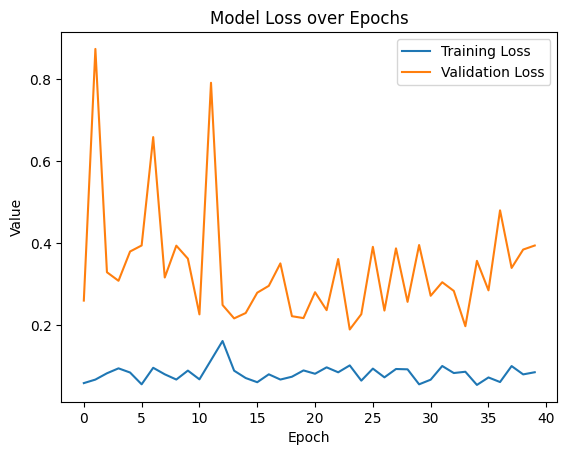

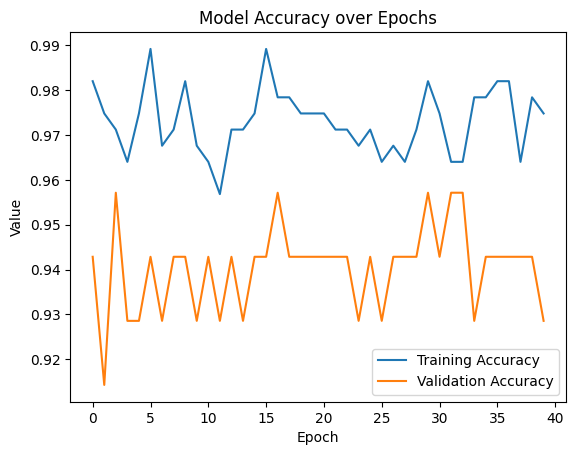

In [194]:
import matplotlib.pyplot as plt

# Plot the loss history
fig, ax = plt.subplots()
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_ylabel('Value')
ax.set_xlabel('Epoch')
ax.set_title('Model Loss over Epochs')
ax.legend()
plt.show()

# Plot the accuracy history
fig, ay = plt.subplots()
ay.plot(history.history['accuracy'], label='Training Accuracy')
ay.plot(history.history['val_accuracy'], label='Validation Accuracy')
ay.set_ylabel('Value')
ay.set_xlabel('Epoch')
ay.set_title('Model Accuracy over Epochs')
ay.legend()
plt.show()
